In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "7QR7t13SCnk9NqsZfsxA7TLWG"
Consumer_Secret_Key = "UG5fMtsvhfed60Ph8x3XioOMI6GZoc1PVp1xOrOvyU4P7ZkoUI"
Access_Token = "1169119459400978435-AFfZGZbq2pPUS0kfDwOOM8tFd2amR3"
Access_Token_Secret = "kx12HUgzobDE89Iqd1gNG1r2cpfBW5oReWR1rgFFqXC3I"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [4]:
posts = api.user_timeline(screen_name="Tokopedia", count = 1000,  lang = "en", tweet_mode = "extended")

#print the last 20 tweets
print ("Show the 20 recent tweets:\n")
i=1
for tweet in posts[:20]:
  print(str(i) + ')'+ tweet.full_text + '\n')
  i=i+1

Show the 20 recent tweets:

1)GIVEAWAY                          GIVEAWAY
ALBUM                                LIGHTSTICK https://t.co/wuccKsQZU1

2)Belanja elektronik harga bersahabat,
bikin kerja jadi makin giat!
Ada diskon hingga 60% dan cashback hingga 200ribu

Cek di sini:
https://t.co/DJZMMNpWzo https://t.co/nwduAYeTII

3)Di rumah aja tetap gaya dengan fashion terbaru yang bisa kamu dapatkan dengan cashback hingga Rp70Rb. Temukan gaya favoritmu di https://t.co/2KblBLyiEh
_
#Fashion

4)Masker Case + Free Bottle - Rp64.900
https://t.co/4oILKsKy26 https://t.co/lUJWCMrCOD

5)masker Case Motif - Rp30.000
https://t.co/HZomjbkdES https://t.co/mNZzlzG65U

6)Masker Case N95 - Rp45.000
https://t.co/LilQ6g2AaO https://t.co/bKVNpVBwwU

7)Masker Case Motif Kartun - Rp15.000
https://t.co/DSLsSiNQ0m https://t.co/U5uOUCu7D2

8)Masker Case - Rp15.900
https://t.co/snH1DUIHQh https://t.co/tYSLgFQdb4

9)Masker Case - Rp15.000
https://t.co/Y8zdSnOK0K https://t.co/1lsbW0BJwz

10)Masker case - Rp.11.000

In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,GIVEAWAY GIVEAWAY\nAL...
1,"Belanja elektronik harga bersahabat,\nbikin ke..."
2,Di rumah aja tetap gaya dengan fashion terbaru...
3,Masker Case + Free Bottle - Rp64.900\nhttps://...
4,masker Case Motif - Rp30.000\nhttps://t.co/HZo...


In [6]:
def cleanTxt(text):
  text = re.sub('@[A-Za - z0-9]+', '', text) #Removing @mentions
  text = re.sub('#', '', text) #Removing '#' has tag
  text = re.sub('RT[\s]+', '', text) #Removing RT
  text = re.sub('https?:\/\/\s+', '', text) #Removing hyperlink
  text = re.sub(r"[-()\"#/@;:<>{}-=~|.?,]","",text)
  text = re.sub(r"can't","cannot",text)
  text = re.sub("\'\w+", '', x)
  return text

  #clean the tweets
  df['Tweets'] = df['Tweets'].apply(cleanTxt)

  #show the cleaned tweets
  df 

In [7]:
#creat a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#creat a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#creat two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,GIVEAWAY GIVEAWAY\nAL...,0.0,0.0
1,"Belanja elektronik harga bersahabat,\nbikin ke...",0.0,0.0
2,Di rumah aja tetap gaya dengan fashion terbaru...,0.0,0.0
3,Masker Case + Free Bottle - Rp64.900\nhttps://...,0.8,0.4
4,masker Case Motif - Rp30.000\nhttps://t.co/HZo...,0.0,0.0
...,...,...,...
195,Yang hobi baca buku mana suaranya? Kamu bisa d...,0.0,0.0
196,Dear 2021 semoga aku lebih sering checkout bar...,0.0,0.0
197,Pagi! Siapa nih artis favorit kamu selama #Tok...,0.0,0.0
198,Lagi nyari kebutuhan kendaraan di akhir tahun?...,0.0,0.0


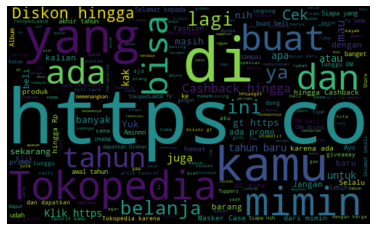

In [8]:
#word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
#create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):


  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df ['Analysis'] = df['Polarity'].apply(getAnalysis)
#show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,GIVEAWAY GIVEAWAY\nAL...,0.0,0.0,Neutral
1,"Belanja elektronik harga bersahabat,\nbikin ke...",0.0,0.0,Neutral
2,Di rumah aja tetap gaya dengan fashion terbaru...,0.0,0.0,Neutral
3,Masker Case + Free Bottle - Rp64.900\nhttps://...,0.8,0.4,Positive
4,masker Case Motif - Rp30.000\nhttps://t.co/HZo...,0.0,0.0,Neutral
...,...,...,...,...
195,Yang hobi baca buku mana suaranya? Kamu bisa d...,0.0,0.0,Neutral
196,Dear 2021 semoga aku lebih sering checkout bar...,0.0,0.0,Neutral
197,Pagi! Siapa nih artis favorit kamu selama #Tok...,0.0,0.0,Neutral
198,Lagi nyari kebutuhan kendaraan di akhir tahun?...,0.0,0.0,Neutral


In [10]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if ( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+ ')' +sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1)Hai, Ibu-ibu, pas suami asyik main game atau sibuk sendiri sama hobi mereka, mending belanja alat-alat dapur di Karnaval Dapur.
Klik link ini https://t.co/09se4xBIod ! Yuk BuIbu buruan diserbu! Mimin nitip yaa buat di kost-an 😆😆
#HomeNLiving #KarnavalDapur

2)@ryang_aja Estetik banget siah alas pancinya! 😎



In [11]:
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if ( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+ ')' +sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

1)Masker Case + Free Bottle - Rp64.900
https://t.co/4oILKsKy26 https://t.co/lUJWCMrCOD

2)Banyak pilihan gadget yang smart di era serba cepat! Yuk belanja di Gadget on Tuesday dan dapatkan Diskon hingga 70% + Cashback hingga 170RB! Klik &gt;
https://t.co/Yp8Fuuobr9
#HPGadget #GOT

3)DROP YOUR FAVORITE GIF HEREEE

👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻

4)@rofidabyan1111 Selamat Tahun Baru 2021, Kak Rofidabyan! Semoga sehat dan bahagia selalu ya Kak! Kami sudah mengirimkan pesan ke Kakak melalui Direct Message (DM) ya Kak. Mohon kesediaan Kakak untuk mengecek DMnya. Kami tunggu balasannya.

5)Throwback performance KING NASSAR di #TokopediaWIB TV SHOW bulan lalu! Siapa yang kangennnn??? Happy birthday juga yaa buat King Nassar🥰👑👑🥰

#KINGNASSARDAY https://t.co/CFs7xl8Qe2

6)BREAKING NEWS LAINNYA 📺 LIVE dari Tokopedia Tower!
Setiap hari Selasa di bulan Januari bakal ada Gadget on Tuesday (GOT) Quiz berhadiah di IG Story Tokopedia!
JANGAN SAMPAI KETINGGALAN 🤩🤩
#HPGadget #Gadg

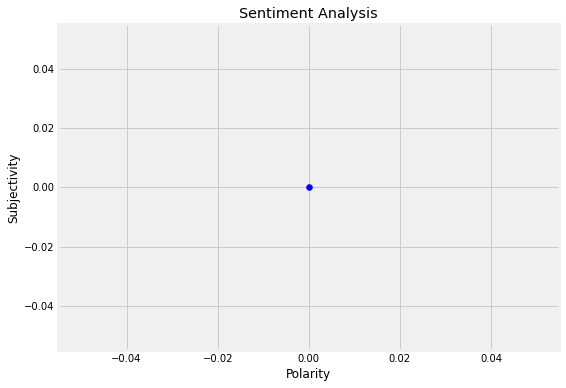

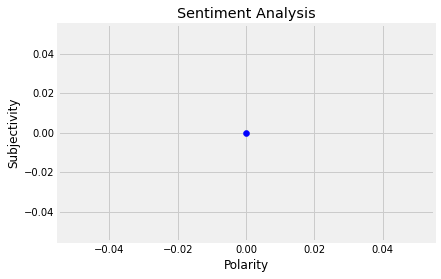

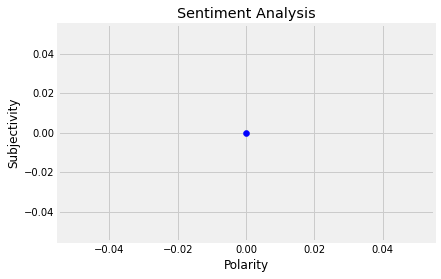

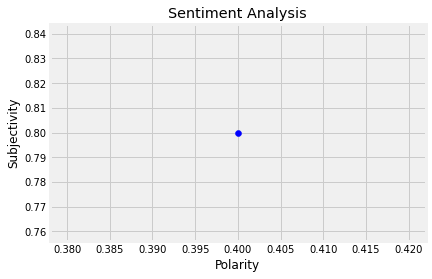

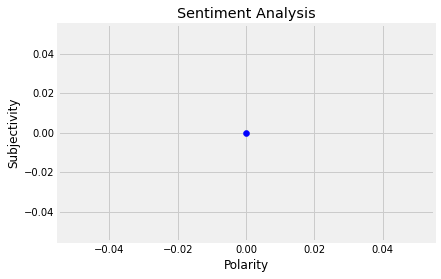

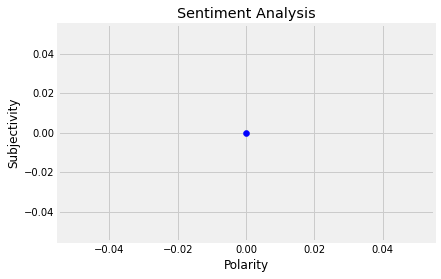

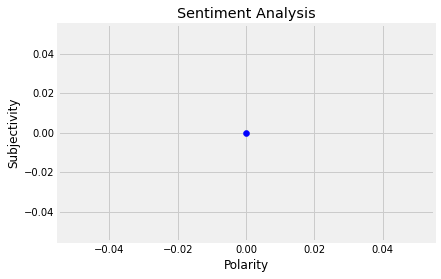

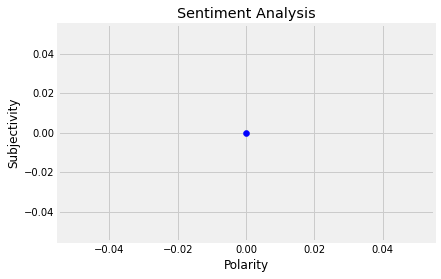

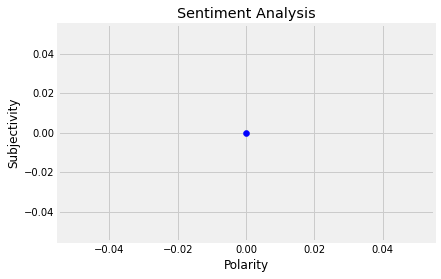

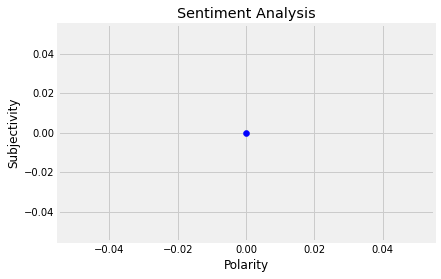

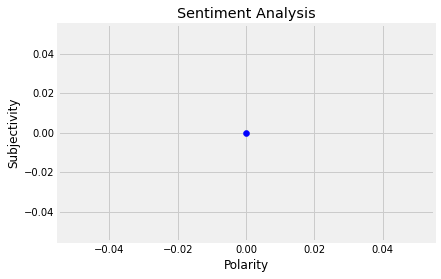

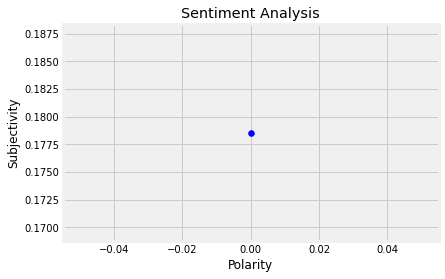

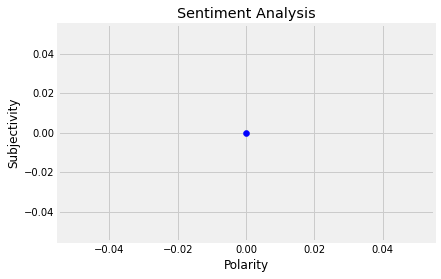

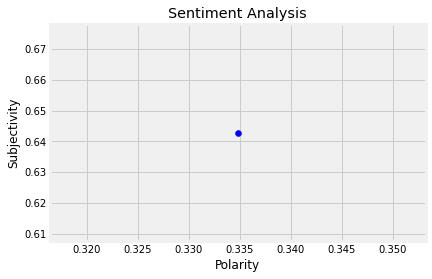

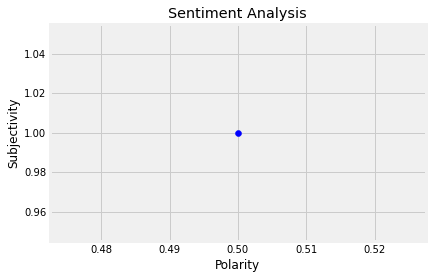

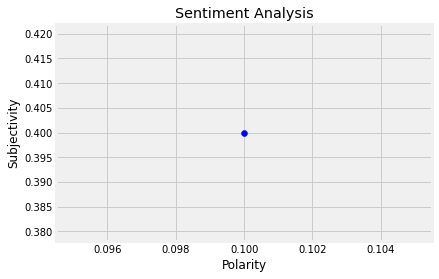

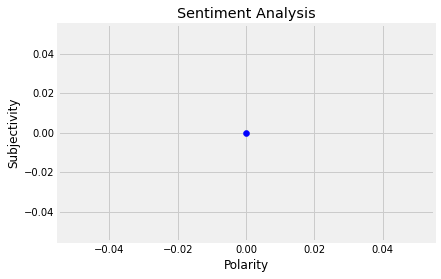

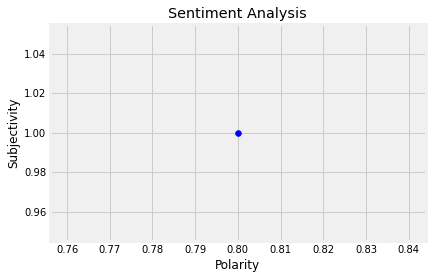

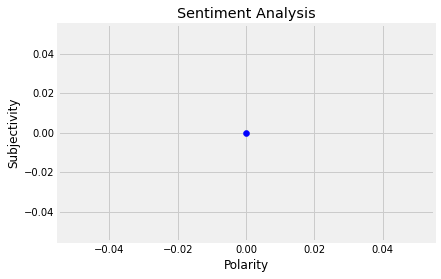

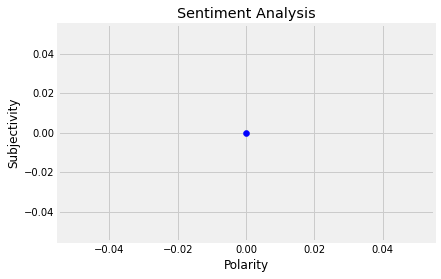

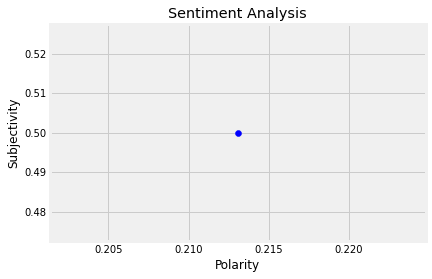

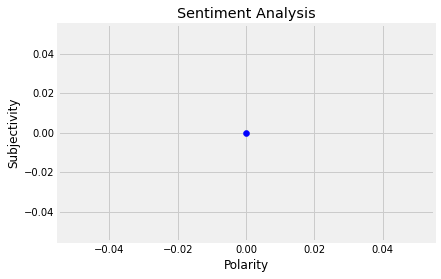

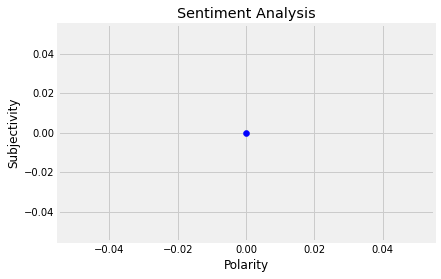

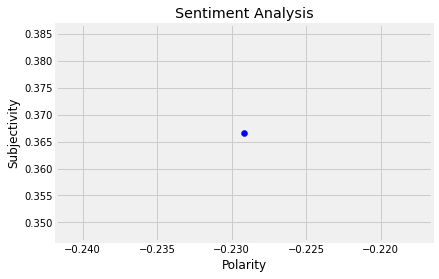

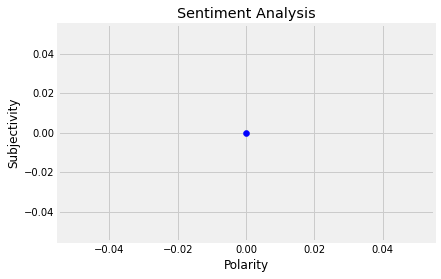

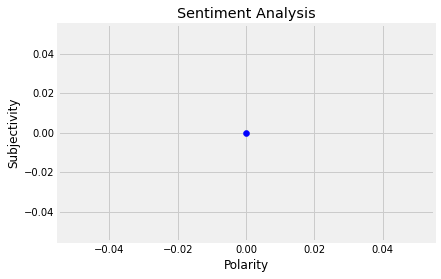

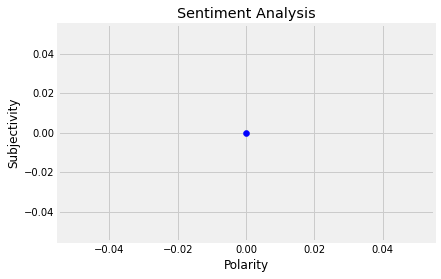

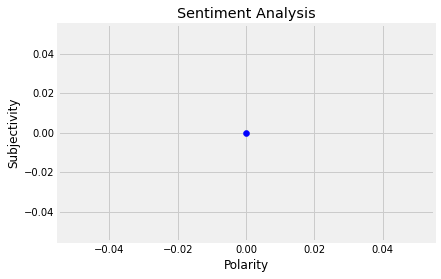

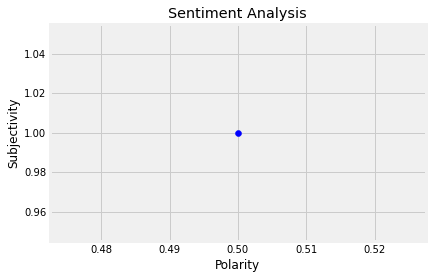

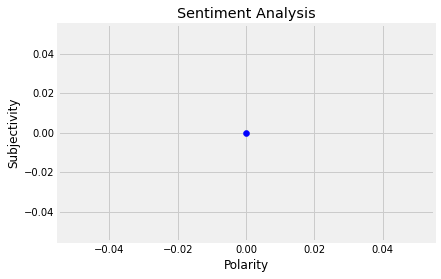

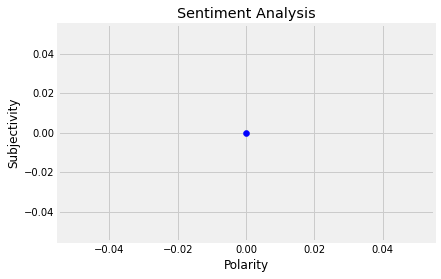

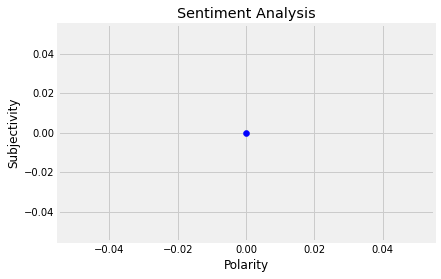

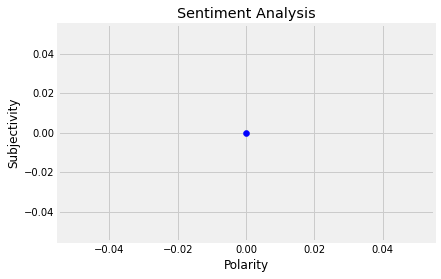

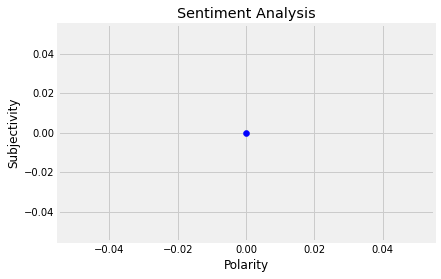

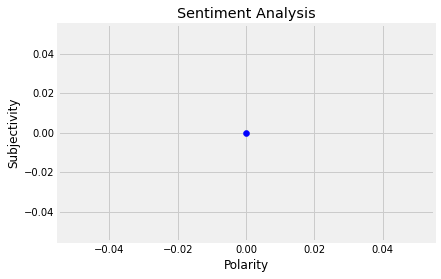

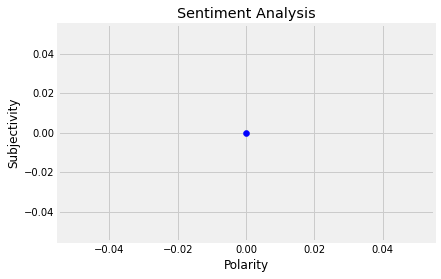

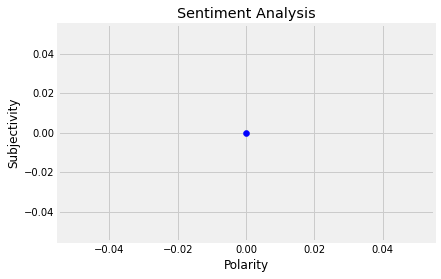

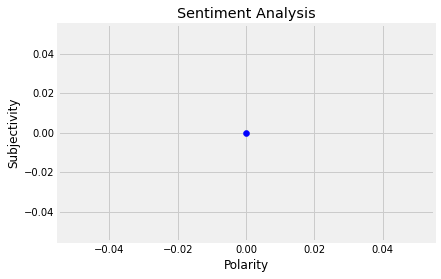

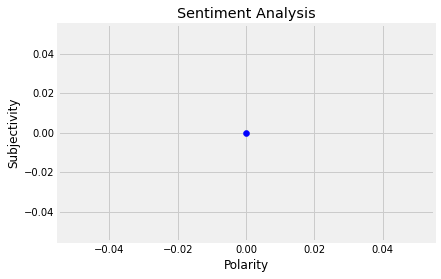

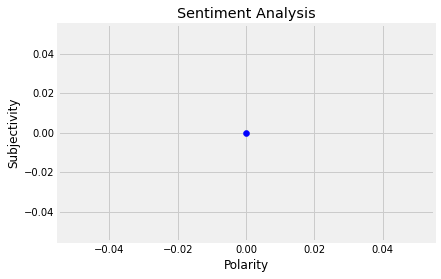

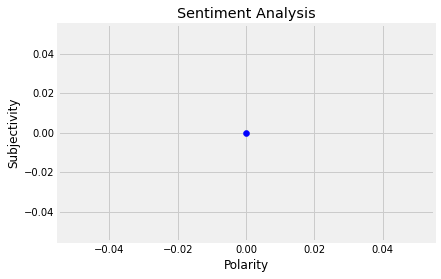

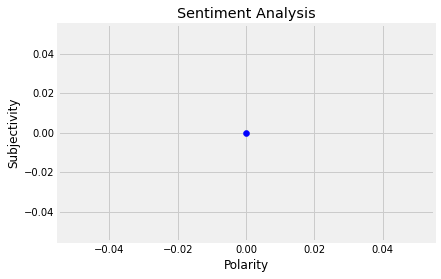

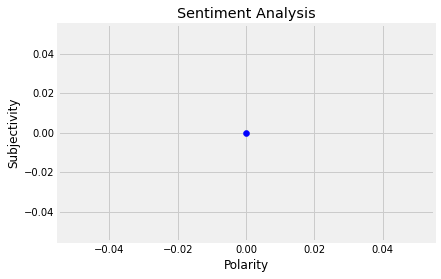

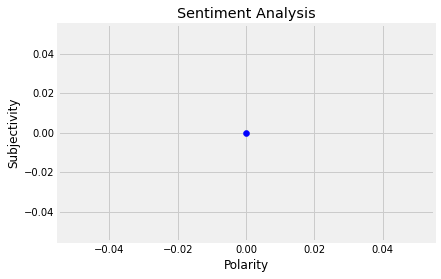

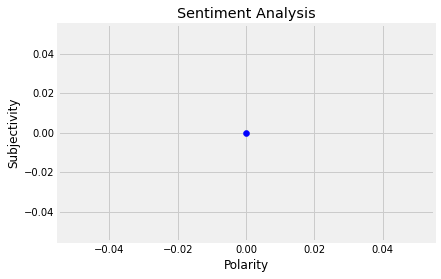

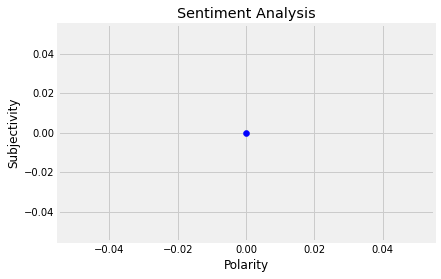

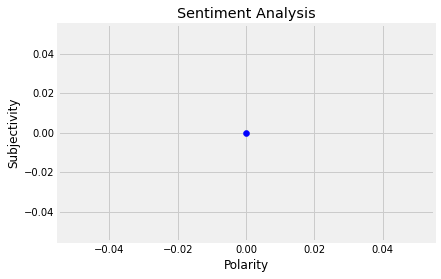

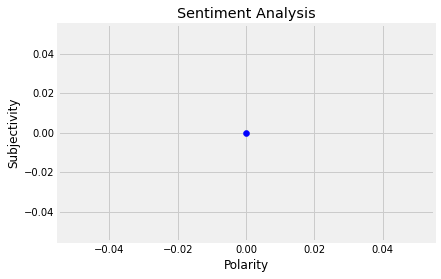

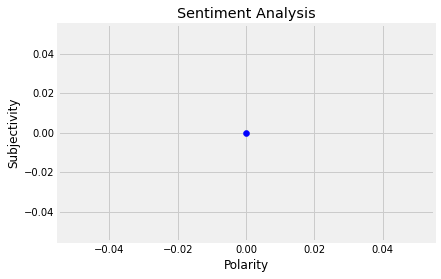

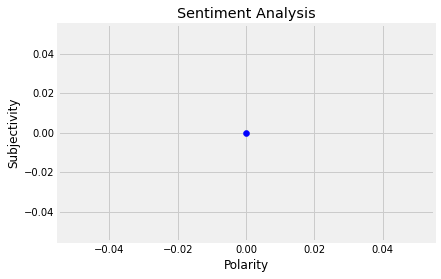

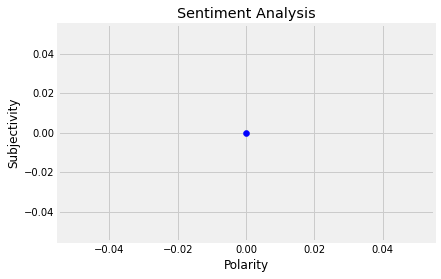

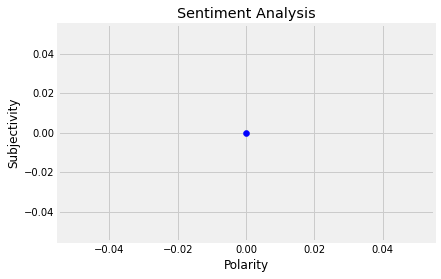

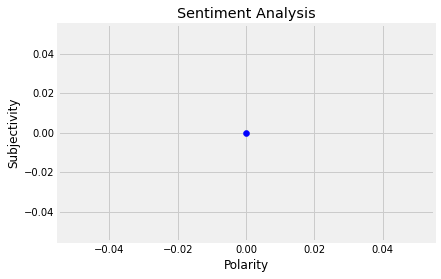

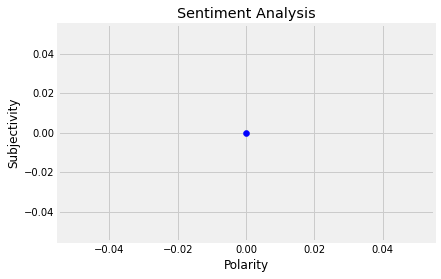

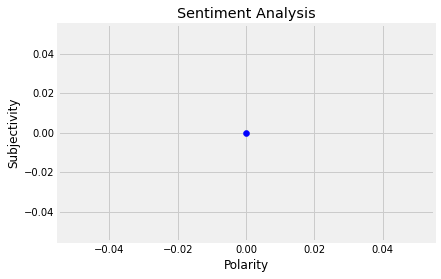

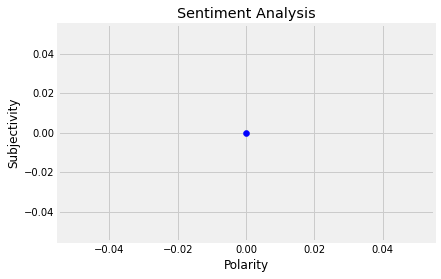

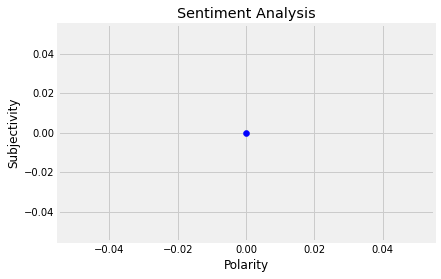

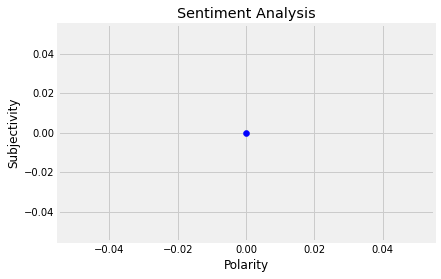

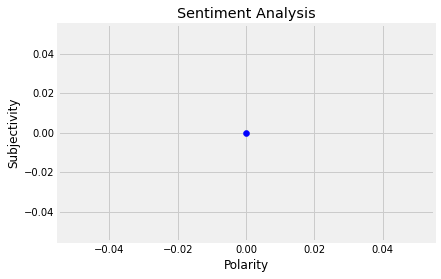

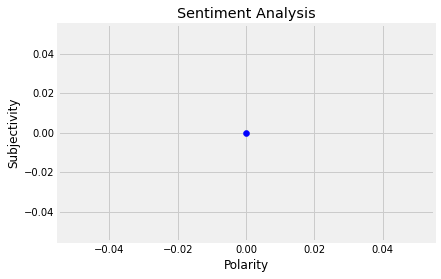

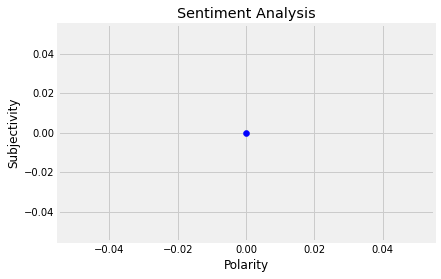

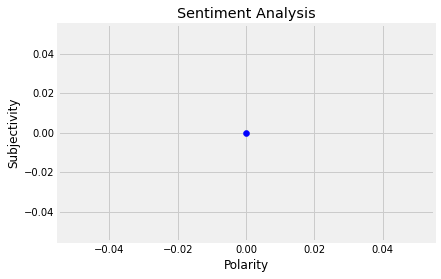

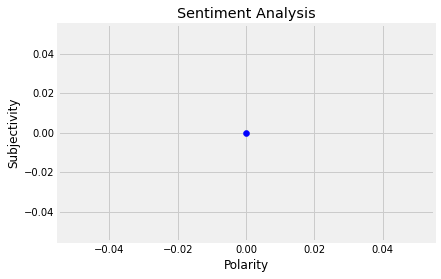

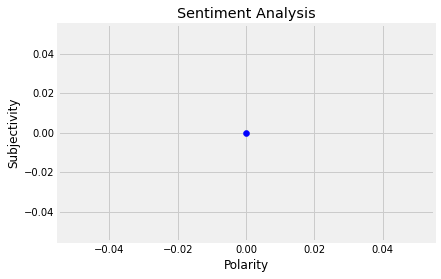

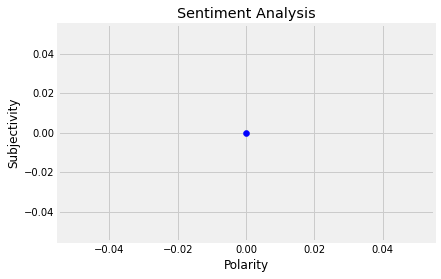

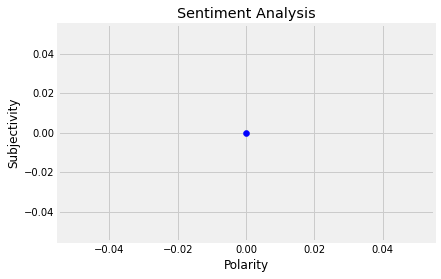

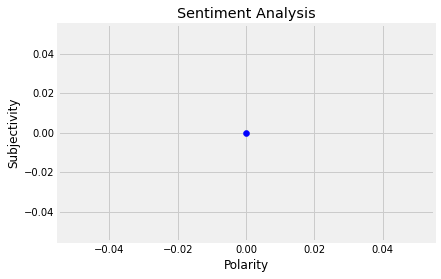

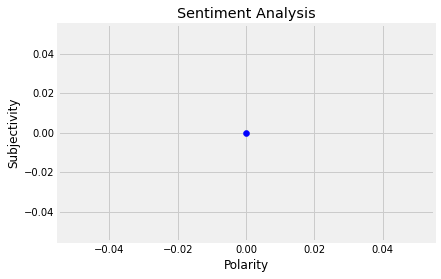

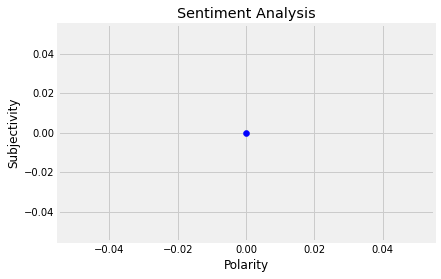

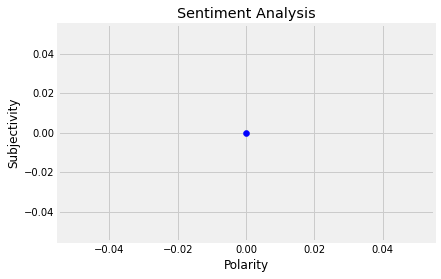

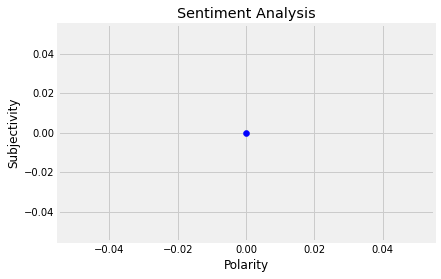

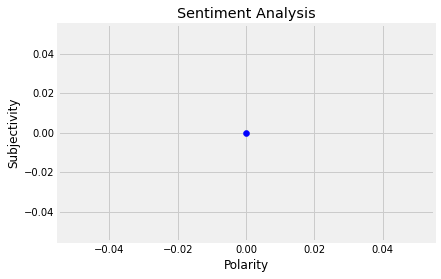

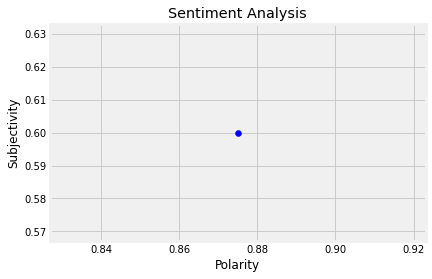

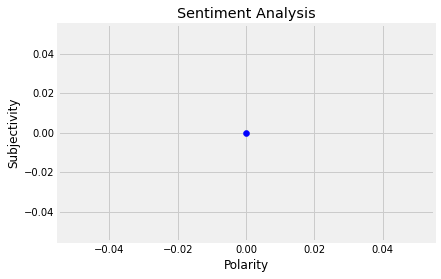

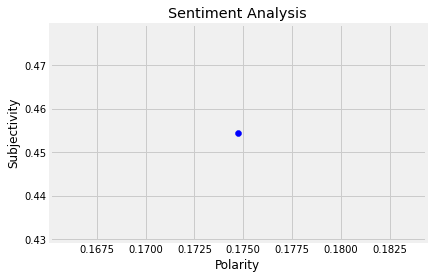

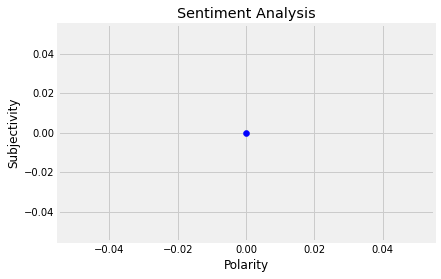

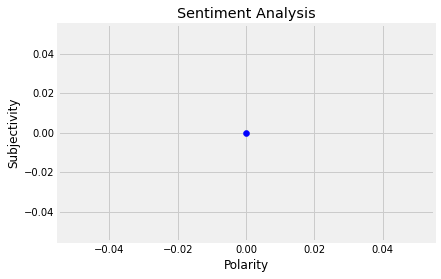

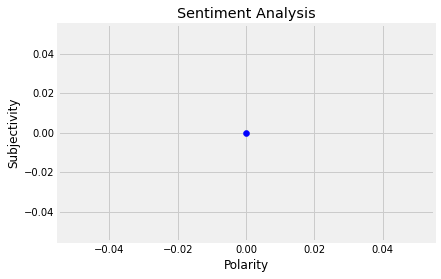

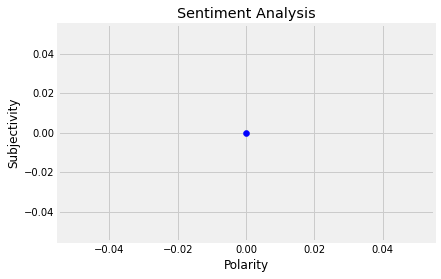

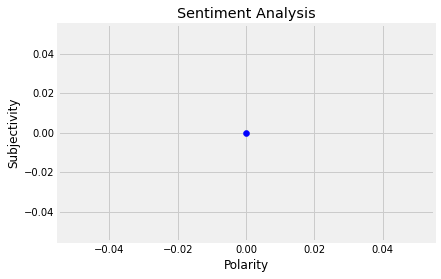

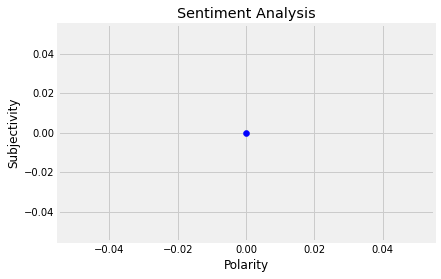

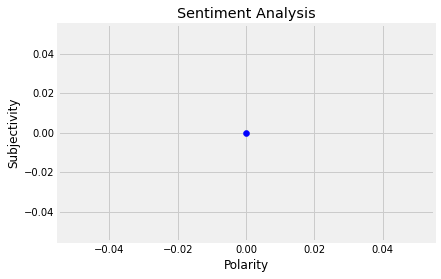

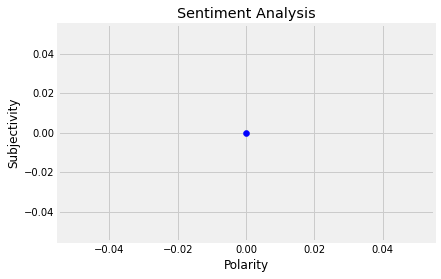

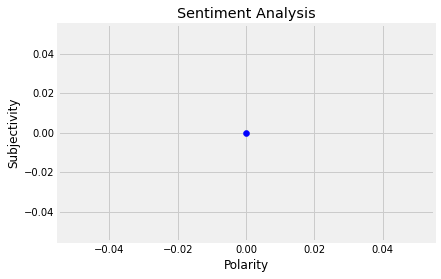

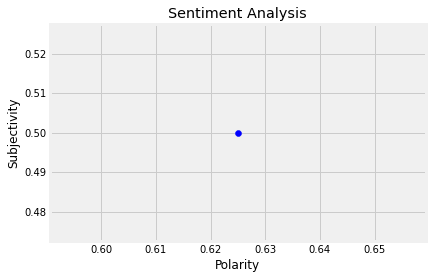

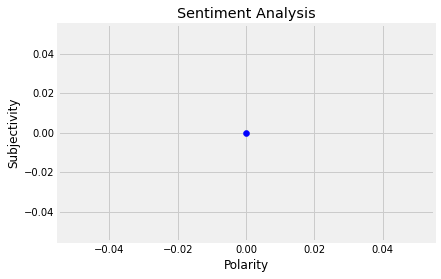

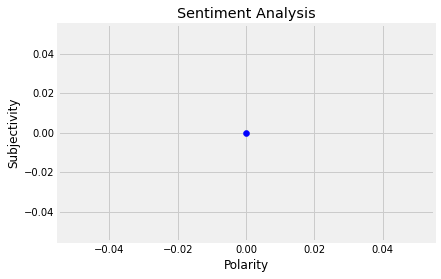

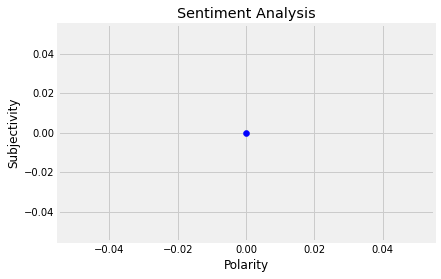

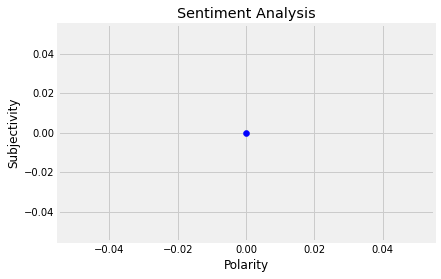

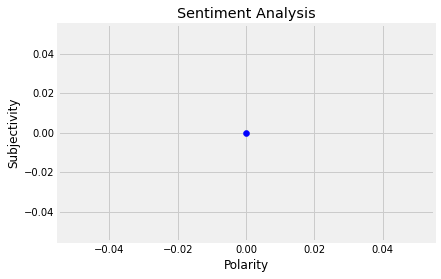

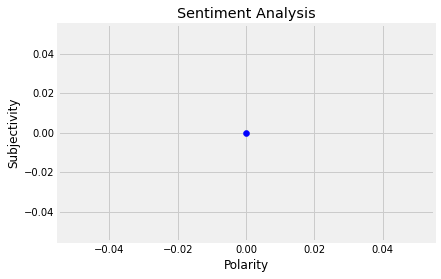

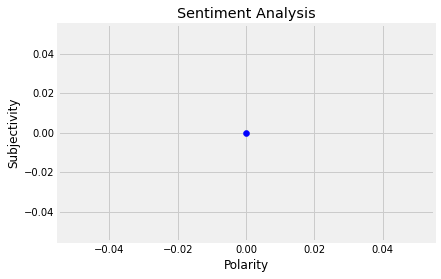

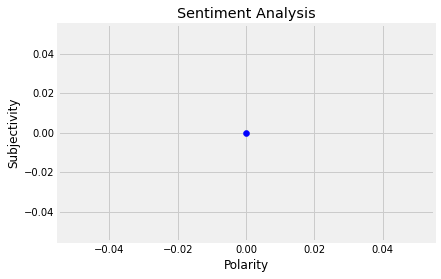

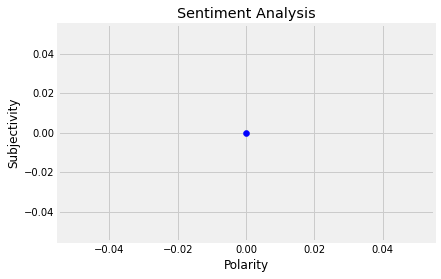

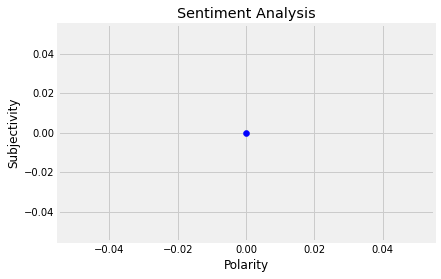

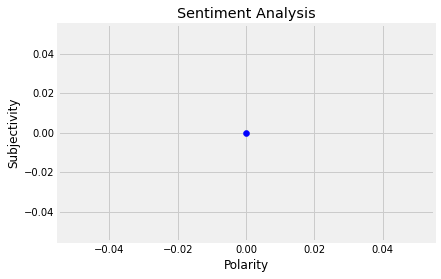

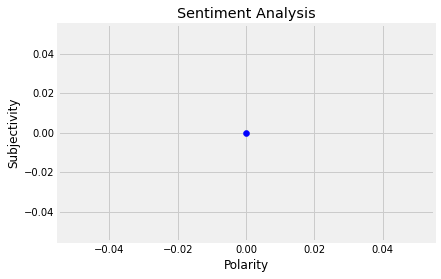

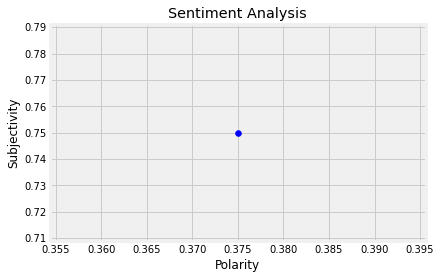

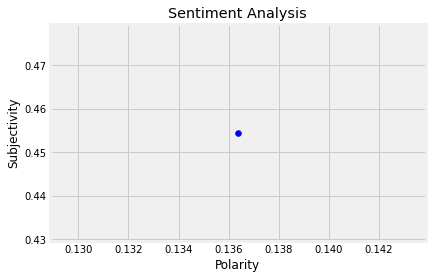

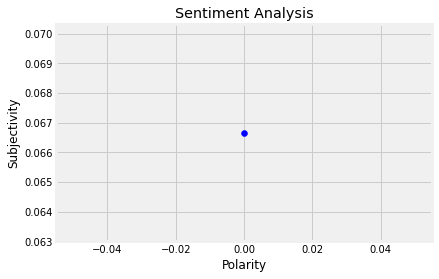

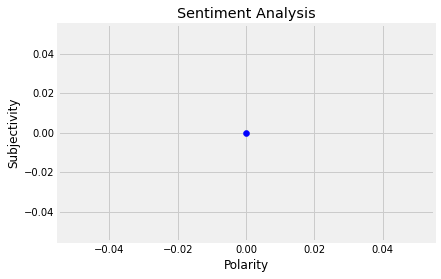

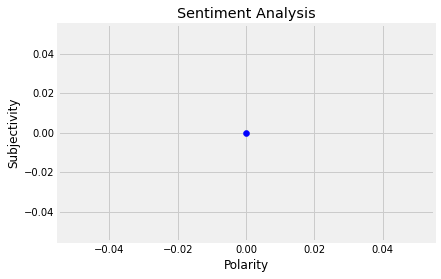

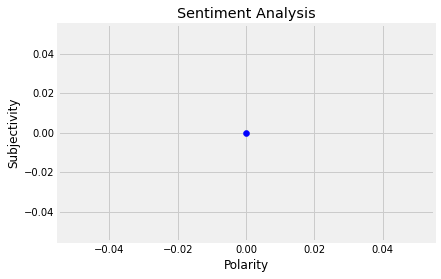

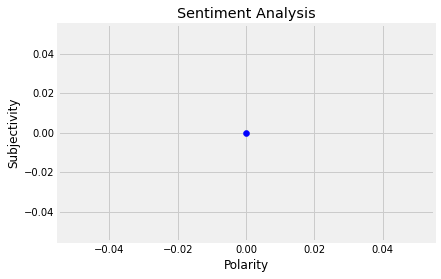

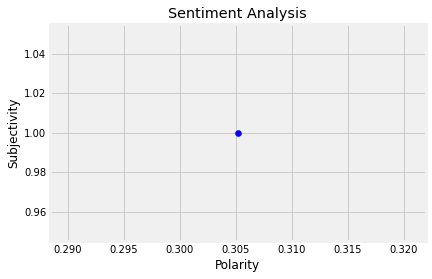

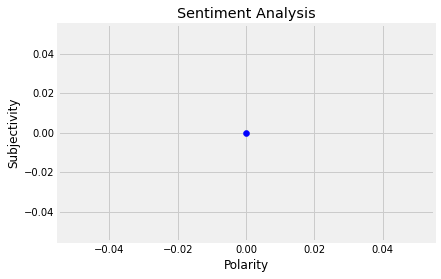

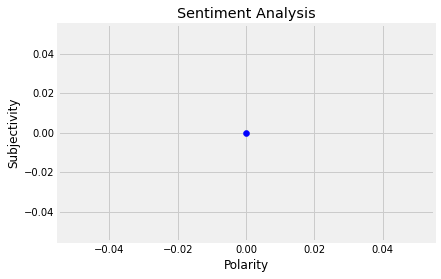

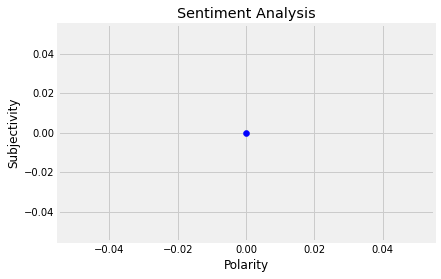

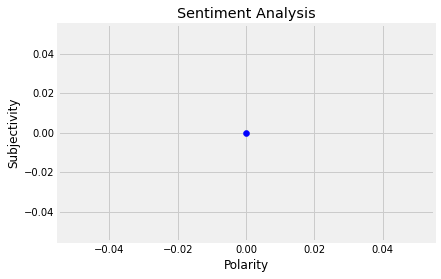

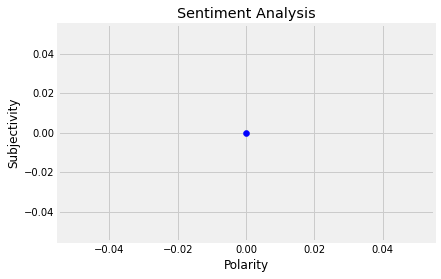

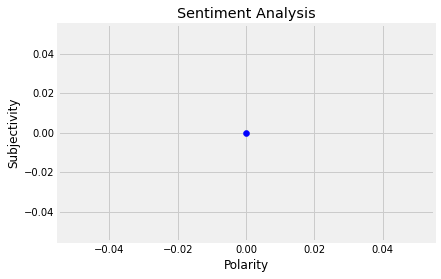

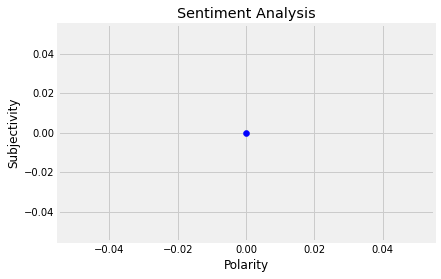

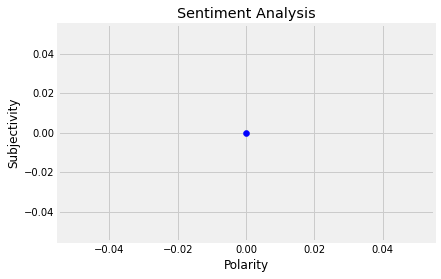

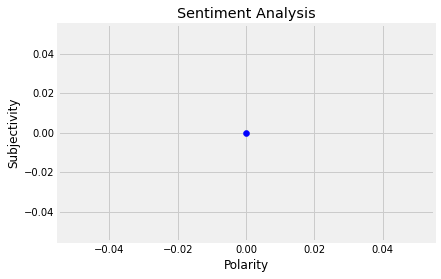

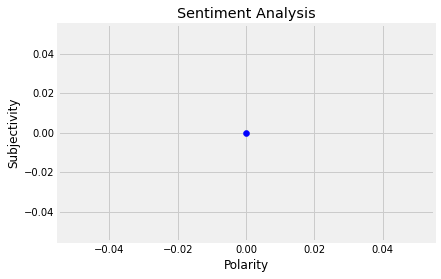

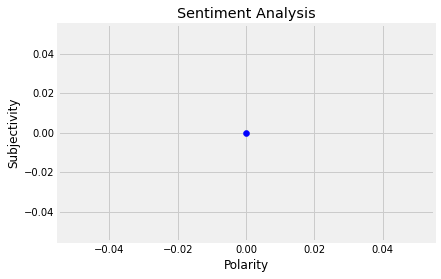

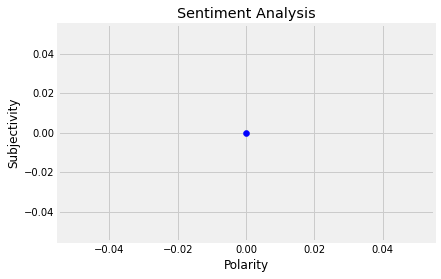

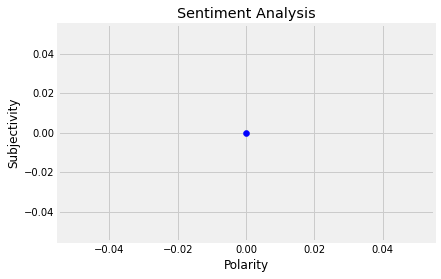

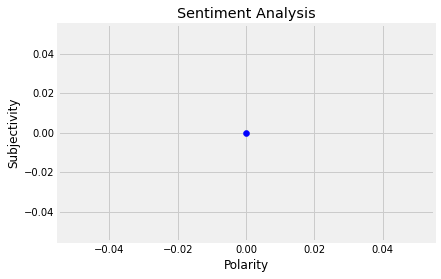

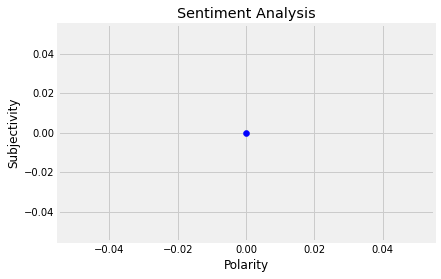

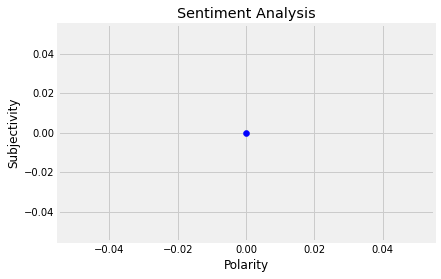

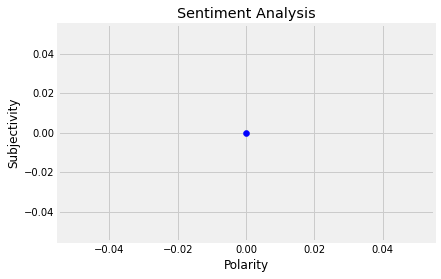

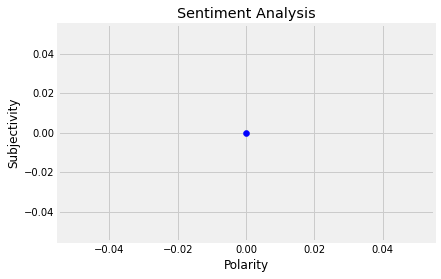

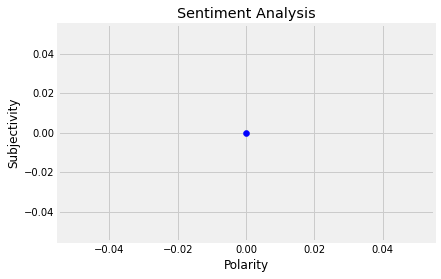

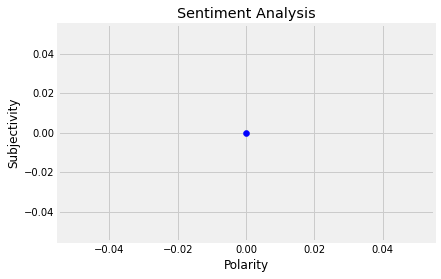

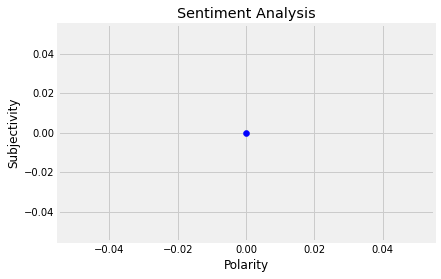

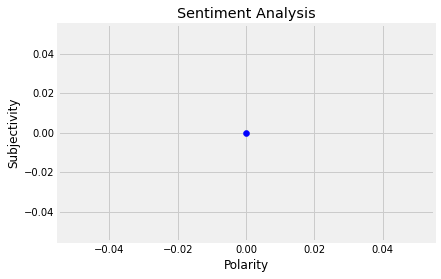

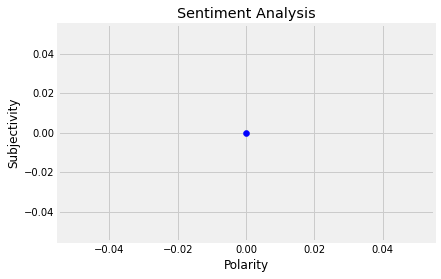

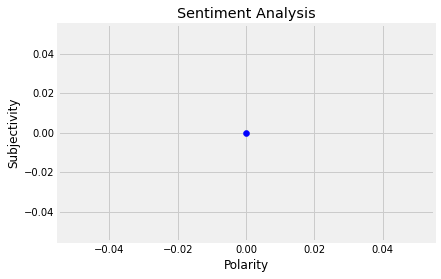

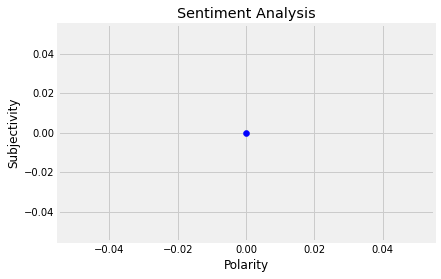

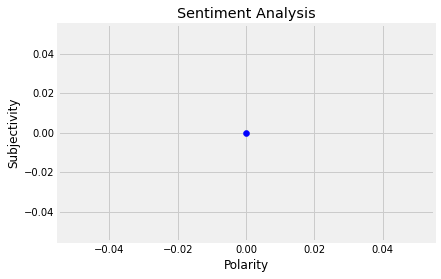

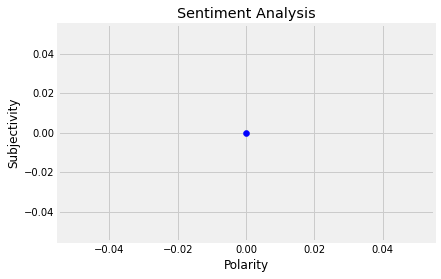

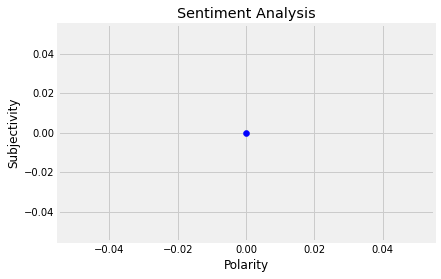

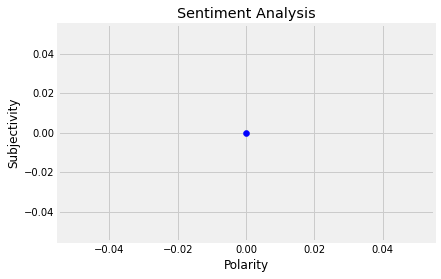

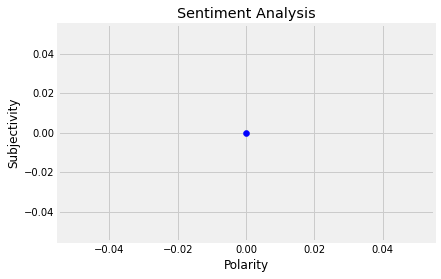

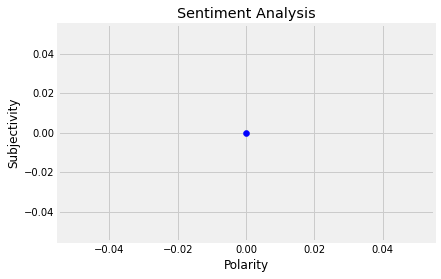

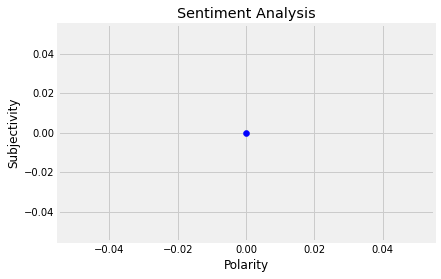

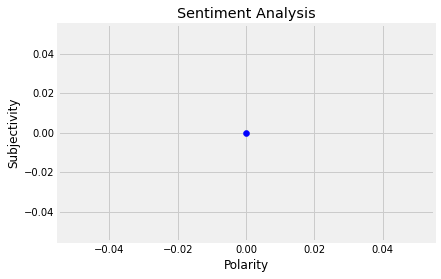

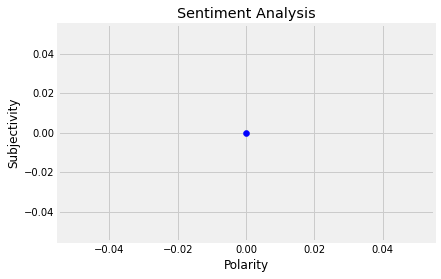

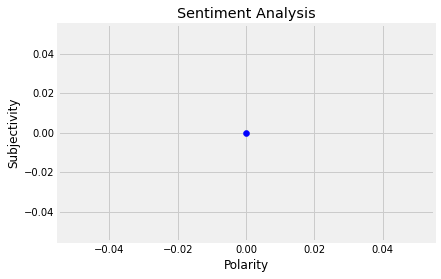

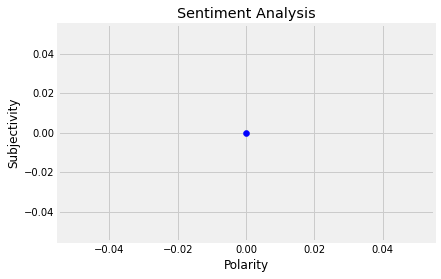

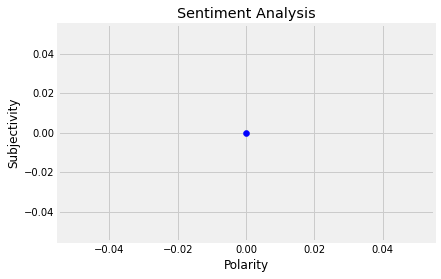

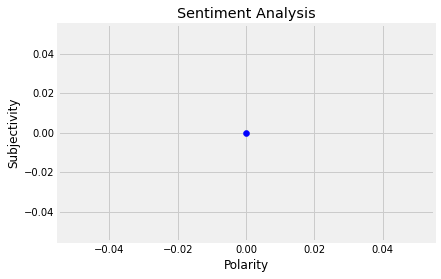

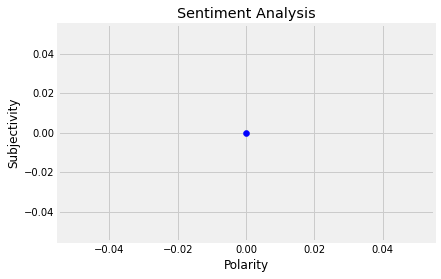

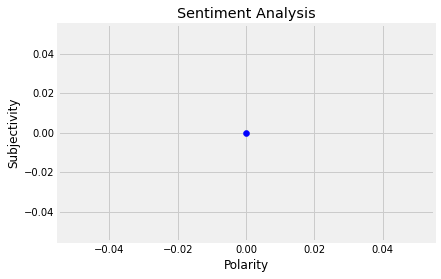

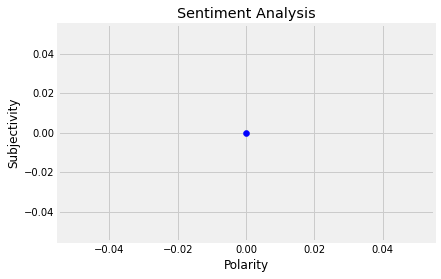

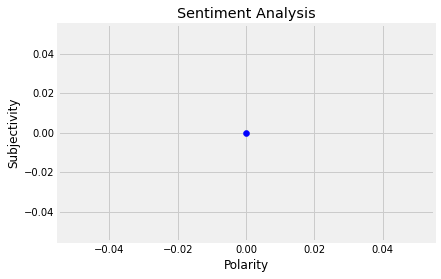

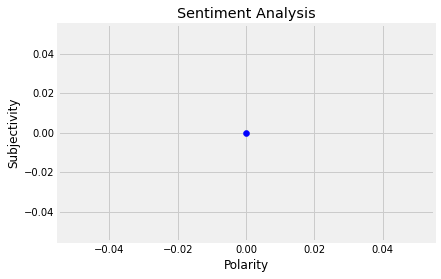

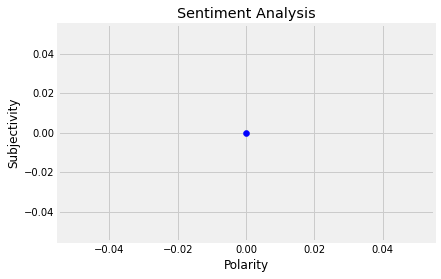

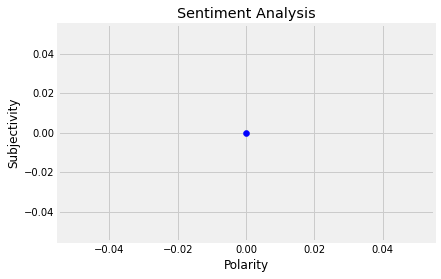

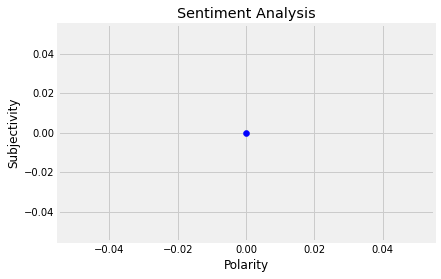

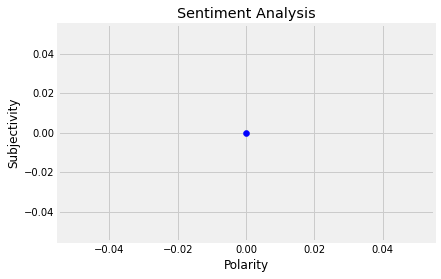

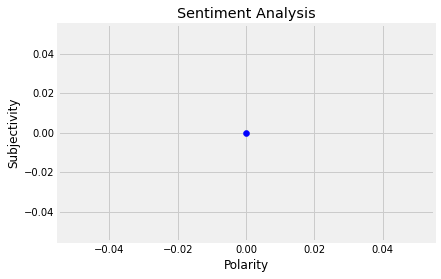

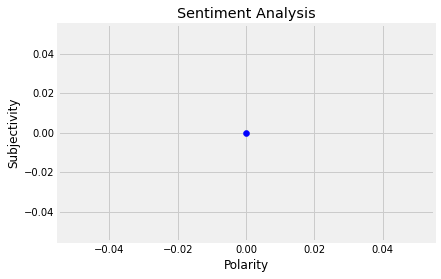

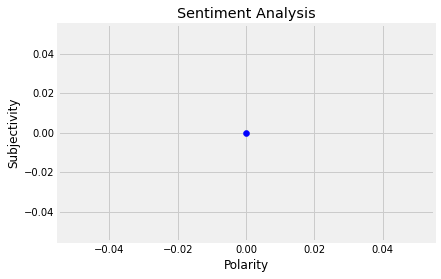

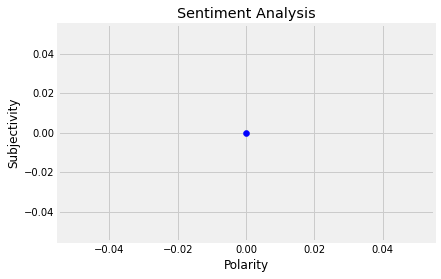

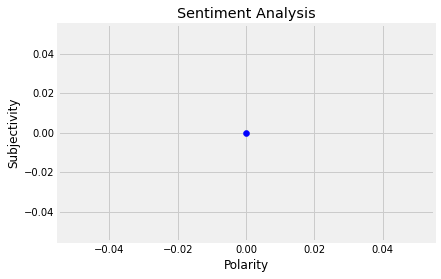

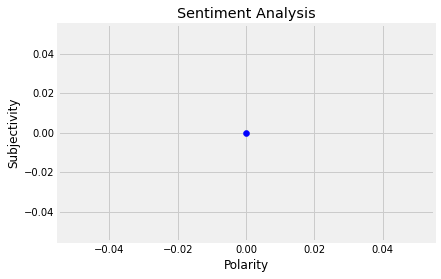

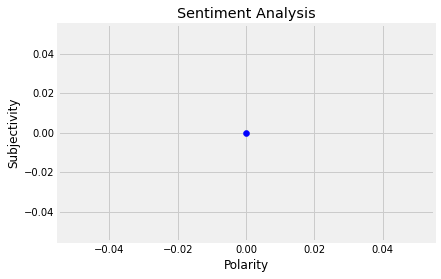

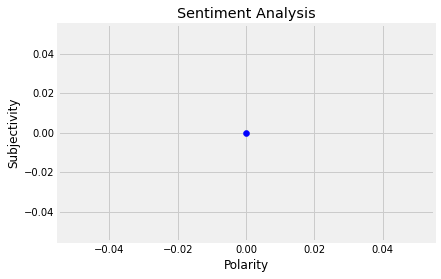

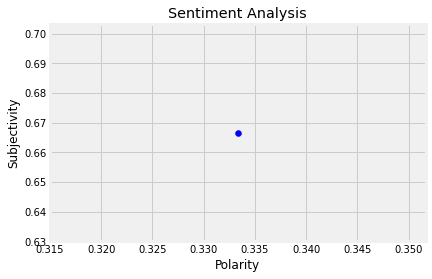

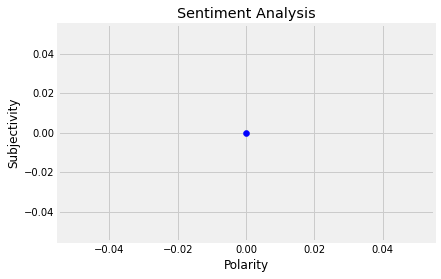

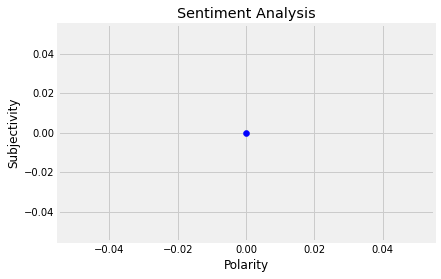

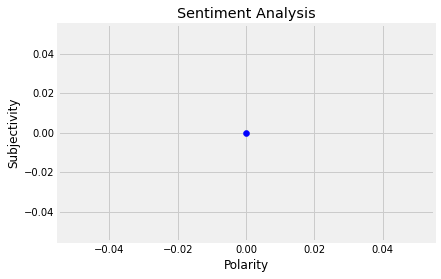

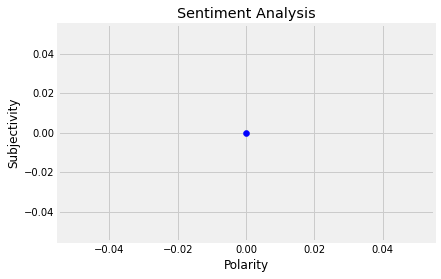

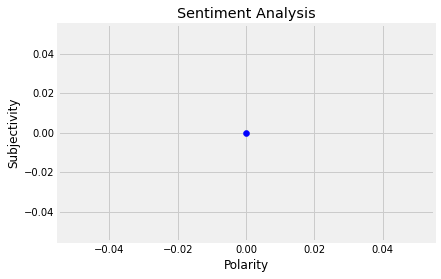

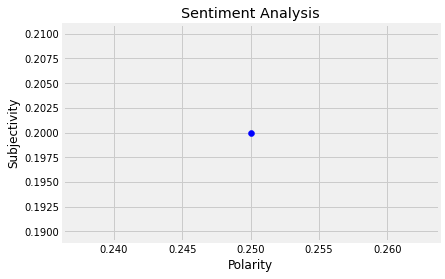

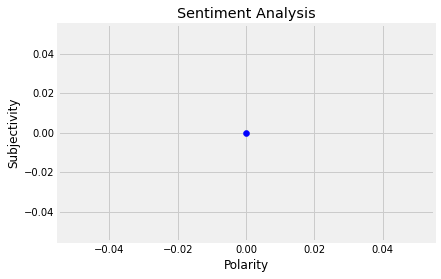

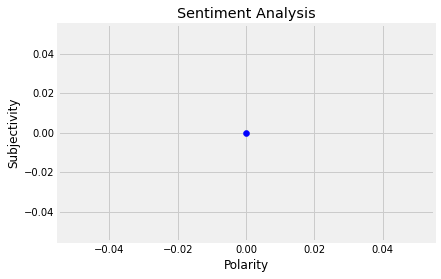

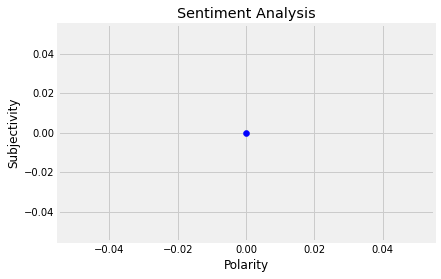

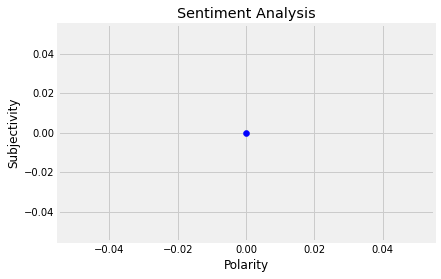

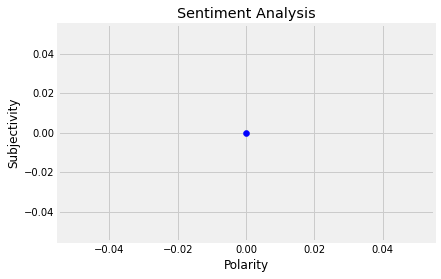

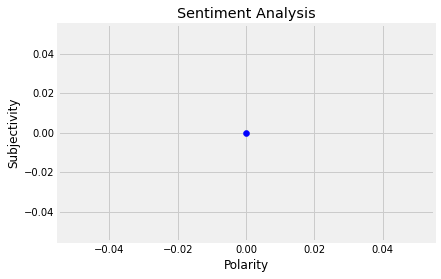

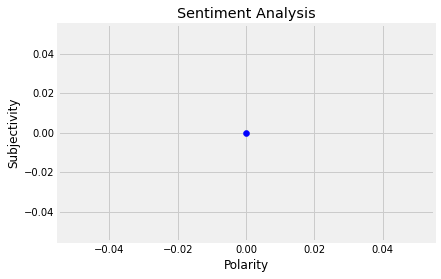

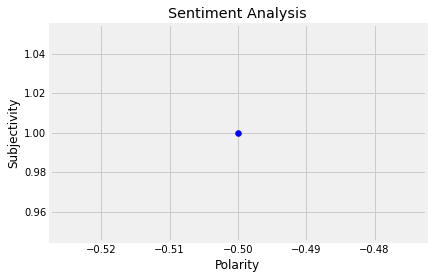

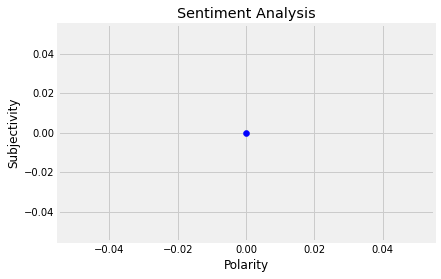

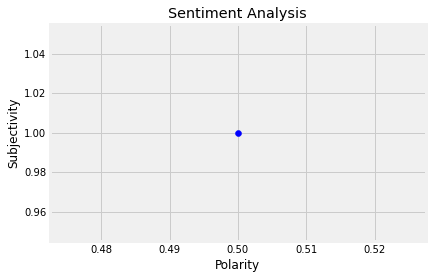

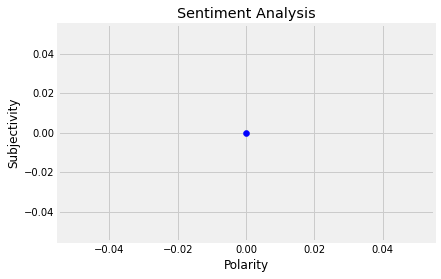

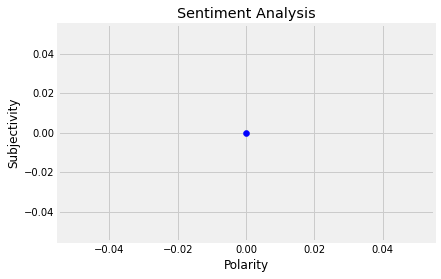

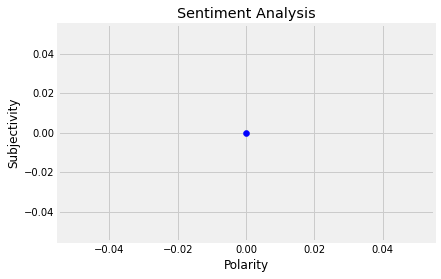

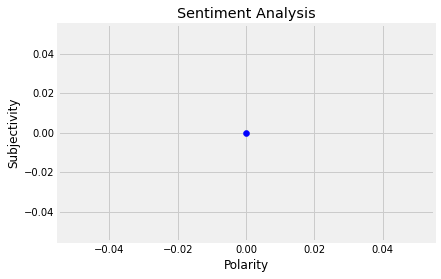

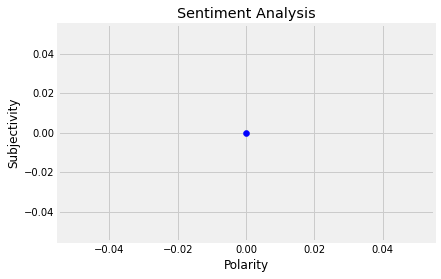

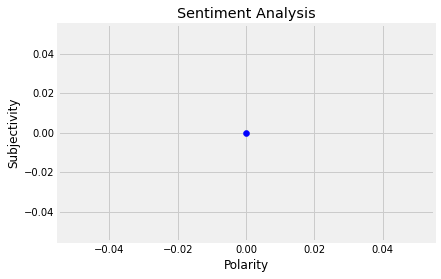

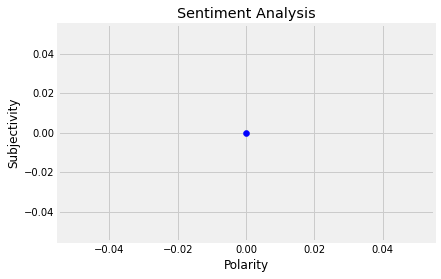

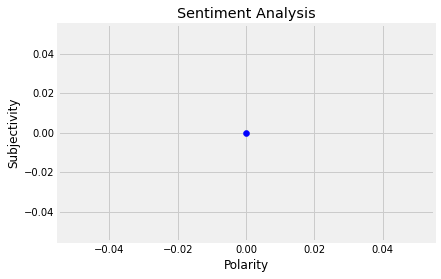

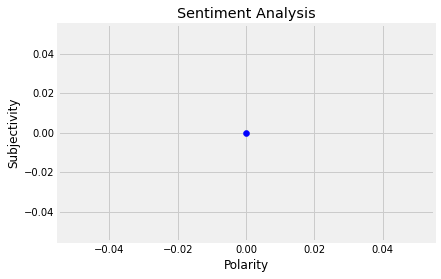

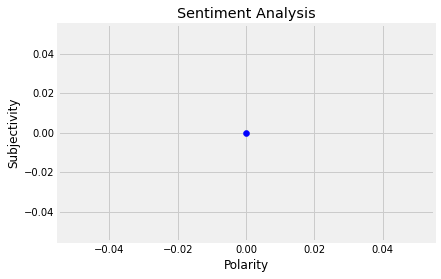

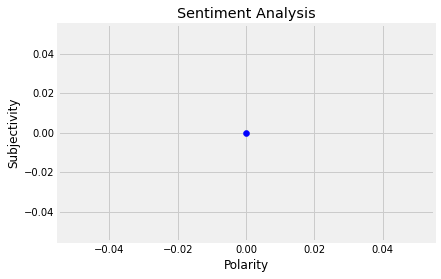

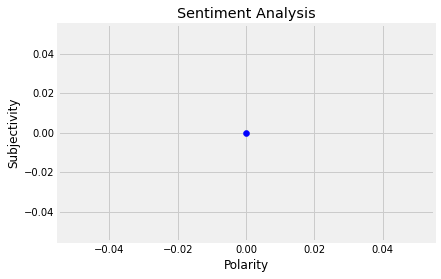

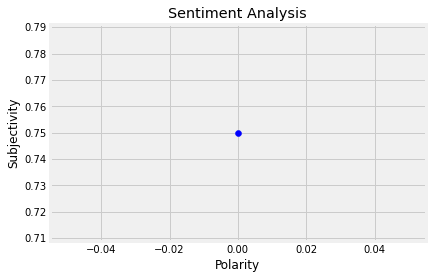

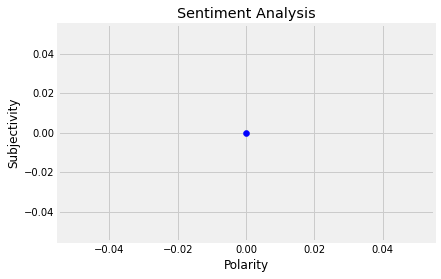

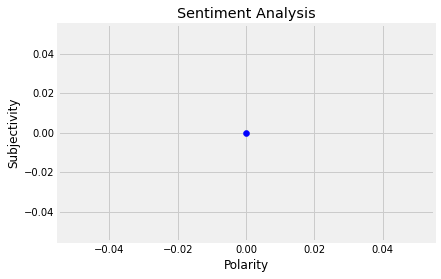

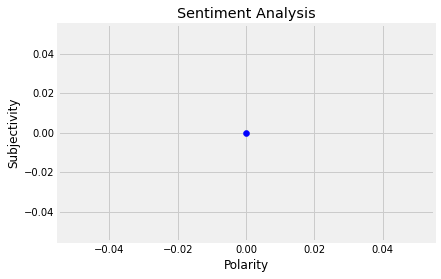

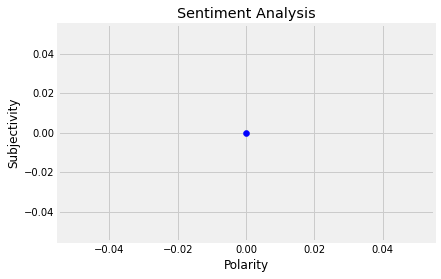

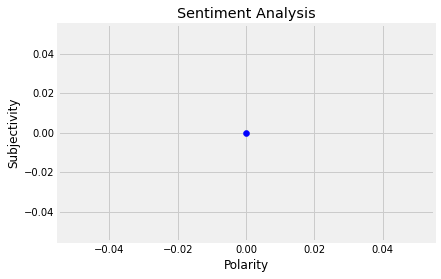

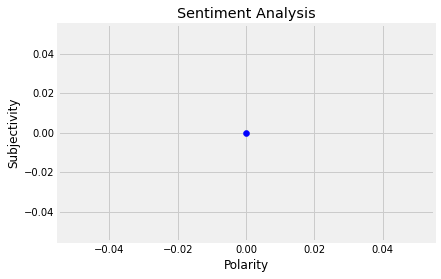

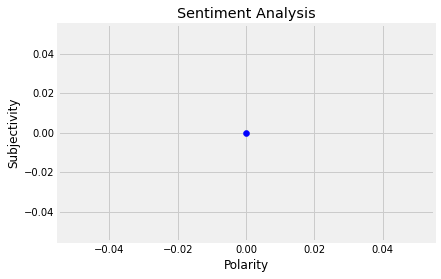

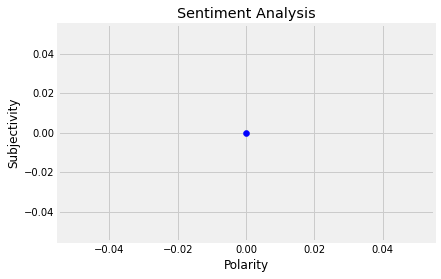

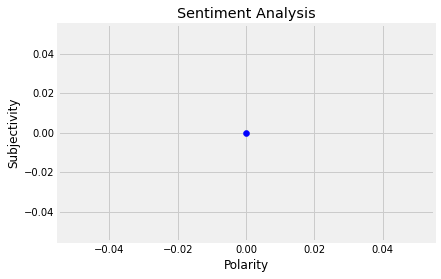

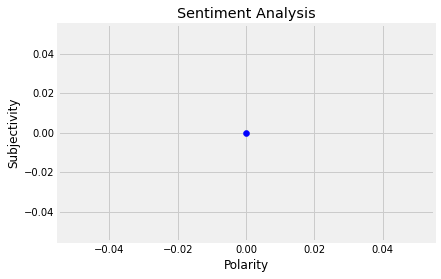

In [12]:
plt.figure(figsize=(8,6))
for i in range(0, sortedDF.shape[0] ):
  plt.scatter(df["Polarity"][i],df["Subjectivity"][i],color='Blue')
  #plt.scatter(x,y,color)
  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
  plt.show()

In [13]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

8.0

In [14]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100 , 1)

1.0

In [15]:
#show the value counts
df['Analysis'].value_counts()

Neutral     182
Positive     16
Negative      2
Name: Analysis, dtype: int64

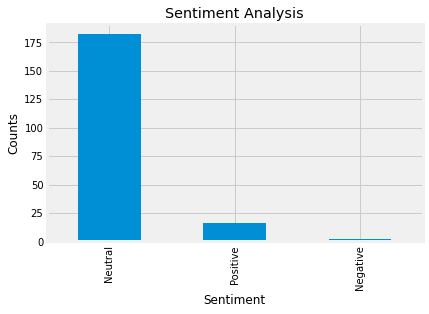

In [16]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

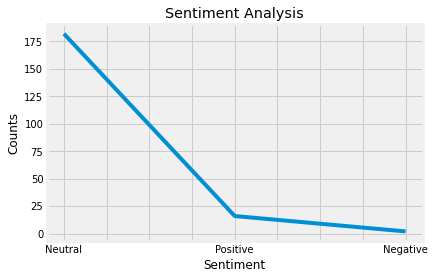

In [17]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()